In [1]:
import tensorflow as tf
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Genarate data
X_data = np.arange(100,step=0.1)
y_data = X_data + 20 * np.sin(X_data/10)

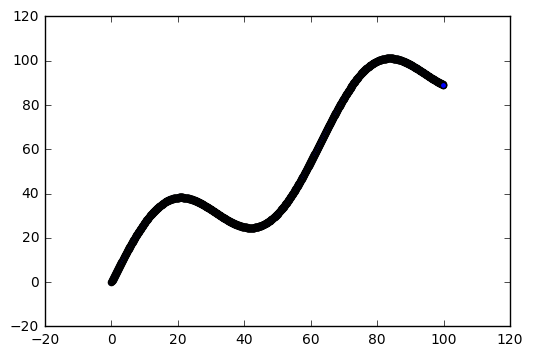

In [3]:
plt.scatter(X_data, y_data)

In [4]:
# Define n_samples, and n_batches
n_samples = 1000
batch_size = 100

In [5]:
# Reshape -- TensorFlow is finicky about shapes
X_data = np.reshape(X_data, (n_samples, 1))
print(X_data.shape)
y_data = np.reshape(y_data, (n_samples, 1))
print(y_data.shape)

(1000, 1)
(1000, 1)


In [6]:
# Define placeholder for the input
X = tf.placeholder(tf.float32, shape=(n_samples,1))
y = tf.placeholder(tf.float32, shape=(n_samples,1))

In [7]:
# Define variables to be learned
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1,1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum( (y-y_pred)**2 / n_samples)

In [8]:
opt = tf.train.AdamOptimizer()

In [9]:
opt_operation = opt.minimize(loss)

In [59]:
# Perform many times
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for loop in range(500):
        indices = np.random.choice(n_samples, batch_size)
        # indices = [293,248,938,394,398, ...] (len=batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        _,loss_val,W_val,b_val = sess.run([opt_operation, loss, W, b], feed_dict={X: X_data, y: y_data})
    print(loss_val,W_val,b_val)

186.213 [[ 1.07645118]] [-0.25270846]


In [60]:
y_linear = W_val* X_data + b_val

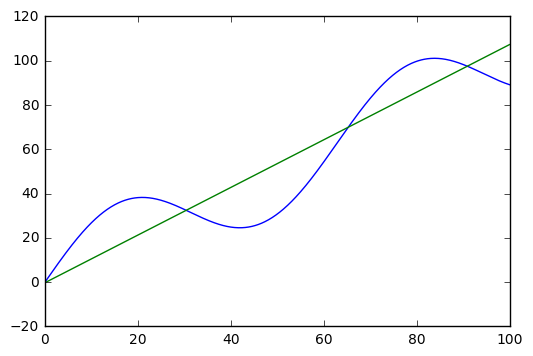

In [61]:
plt.plot(X_data, y_data,X_data, y_linear)